# Krypton analysis

## Imports

In [27]:
import os
import glob
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

2018-03-07 17:59:47


In [28]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
from invisible_cities.database import load_db

import invisible_cities.sierpe.blr as blr

import invisible_cities.reco.tbl_functions as tbl
import invisible_cities.reco.peak_functions as pkf
import invisible_cities.reco.calib_sensors_functions as csf
from   invisible_cities.reco.xy_algorithms      import corona

from   invisible_cities.evm.ic_containers  import S12Params 
from   invisible_cities.evm.ic_containers  import CalibVectors
from   invisible_cities.evm.ic_containers  import DeconvParams
from   invisible_cities.evm.ic_containers  import ThresholdParams

from   invisible_cities.core.system_of_units_c import units
from   invisible_cities.core.core_functions import loc_elem_1d
from   invisible_cities.core.core_functions import in_range
from   invisible_cities.core.core_functions import weighted_mean_and_var
from   invisible_cities.core.core_functions import timefunc
from   invisible_cities.core.exceptions     import SipmZeroCharge
from   invisible_cities.types.ic_types import minmax
from   invisible_cities.types.ic_types import NN
import invisible_cities.icaro.mpl_functions as mpl
import invisible_cities.icaro.signal_functions_mpl as sf
from invisible_cities.icaro.pmaps_mpl import plot_s12
from invisible_cities.sierpe                 import blr

In [30]:
from invisible_cities.reco.dst_functions  import load_dst
from invisible_cities.io.dst_io  import load_dsts

In [31]:
from invisible_cities.evm .pmaps             import S1
from invisible_cities.evm .pmaps             import S2

In [32]:
from typing      import NamedTuple

In [142]:
import krs12_functions as krf
import invisible_cities.core.fit_functions as fitf

## NB functions

### Utilities

In [34]:
def sort_s12s(s12s):
    return sorted(s12s, key= lambda s12 : s12.total_energy, reverse=True)

In [35]:
def file_list(run_number, file_numbers, path='/Users/jjgomezcadenas/Projects/ICDEV/data'):
    return ['{}/run_{}_{}_waveforms.h5'.format(path, run_number, file_number) for file_number in file_numbers]

In [36]:
def create_empty_lists(number_of_lists = 2):
    return ([] for i in range(number_of_lists))
    

### Analysis

### Histograms

In [38]:
class RunInfo(NamedTuple):
    label : str
    dst    : pd.DataFrame 
    ns     : pd.DataFrame

### Run 5349 with 7.5 kV and variable rate

## Run 5282 with 7.5 kV and variable rate

In [251]:
nsdst, dst= krf.read_dsts('/Users/jjgomezcadenas/Projects/icdev/dsts/5282')

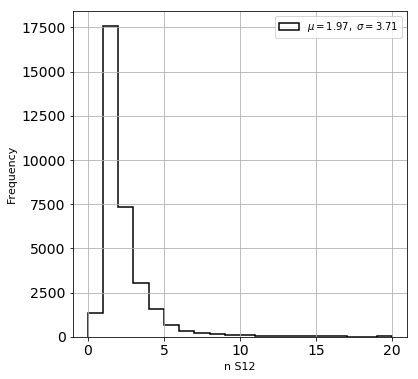

In [252]:
krf.histo_ns12(nsdst.ns1)

In [253]:
krf.print_ns12_stats(*krf.ns1_stats(nsdst))

ns12: mean =  1.97 sigma =  3.71
ns12 : fraction
0:  0.04
1:  0.54
2:  0.22
3:  0.09
4:  0.11


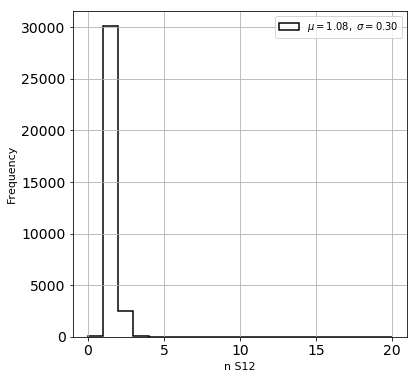

In [254]:
krf.histo_ns12(nsdst.ns2)

In [255]:
krf.print_ns12_stats(*krf.ns2_stats(nsdst))

ns12: mean =  1.08 sigma =  0.30
ns12 : fraction
0:  0.00
1:  0.92
2:  0.08
3:  0.00


In [256]:
dst5259.head()

,index,evt,ns1,es1,hs1,ws1,ts1,ns2,es2,ws2,ts2,qs2,xs2,ys2,nsi
0,0,0.0,2.0,14.405327,2.277732,200.0,275.40,1.0,9242.655126,9396.914439,654.467548,306.300726,-50.810476,-43.701218,9.0
1,1,0.0,2.0,11.334105,2.304146,150.0,377.55,1.0,9242.655126,9396.914439,654.467548,306.300726,-50.810476,-43.701218,9.0
2,2,1.0,1.0,13.312341,2.314015,200.0,514.20,2.0,16560.701365,8646.038250,653.484164,828.255105,-65.673715,100.091352,14.0
3,3,1.0,1.0,13.312341,2.314015,200.0,514.20,2.0,376.544331,1588.888301,942.614123,-999999.000000,-999999.000000,-999999.000000,-999999.0
4,4,2.0,1.0,6.457348,1.357369,125.0,280.65,1.0,8143.162743,10716.743697,653.485449,267.313584,-49.356687,44.486061,9.0


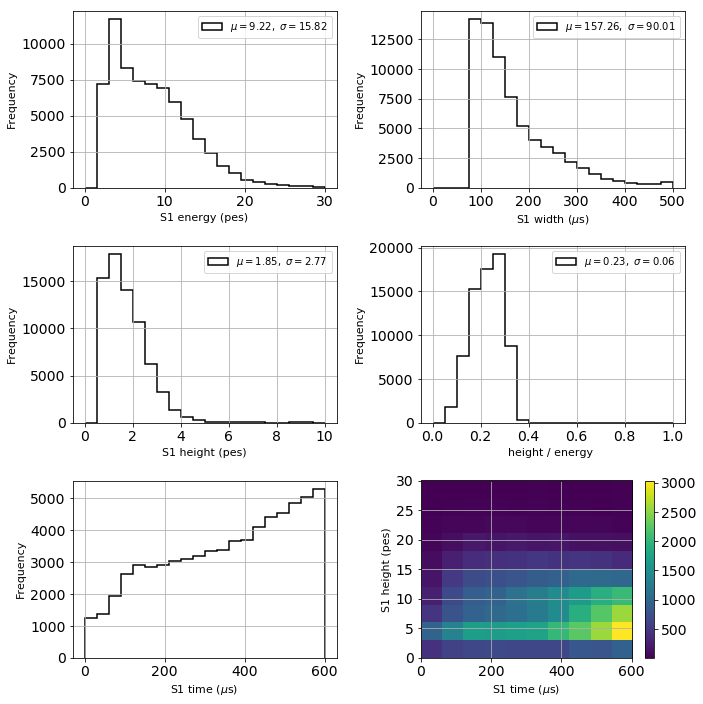

In [257]:
krf.plot_s1histos(dst, bins=20, figsize=(10,10))

In [258]:
dst1s1 = dst[dst.ns1==1]

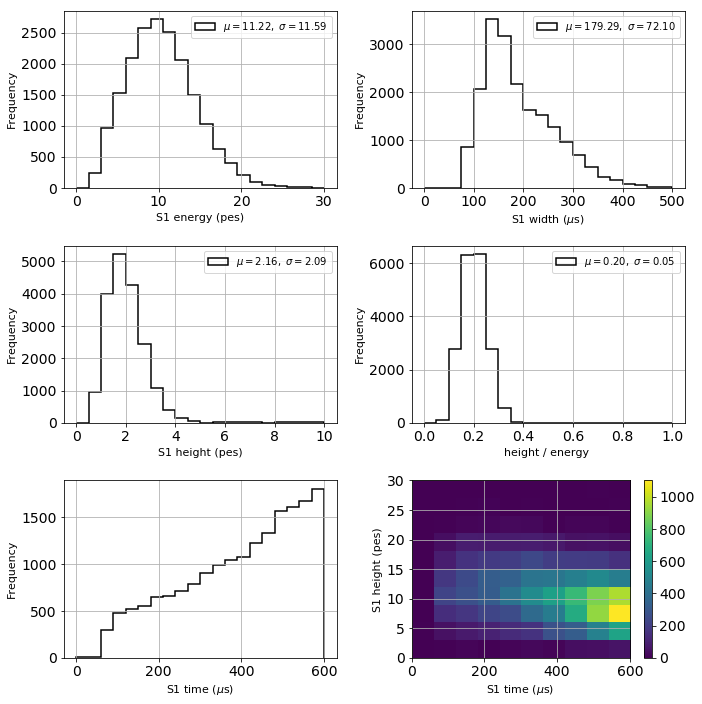

In [259]:
krf.plot_s1histos(dst1s1, bins=20, figsize=(10,10))

In [260]:
dst1s12 = dst1s1[dst1s1.ns2==1]

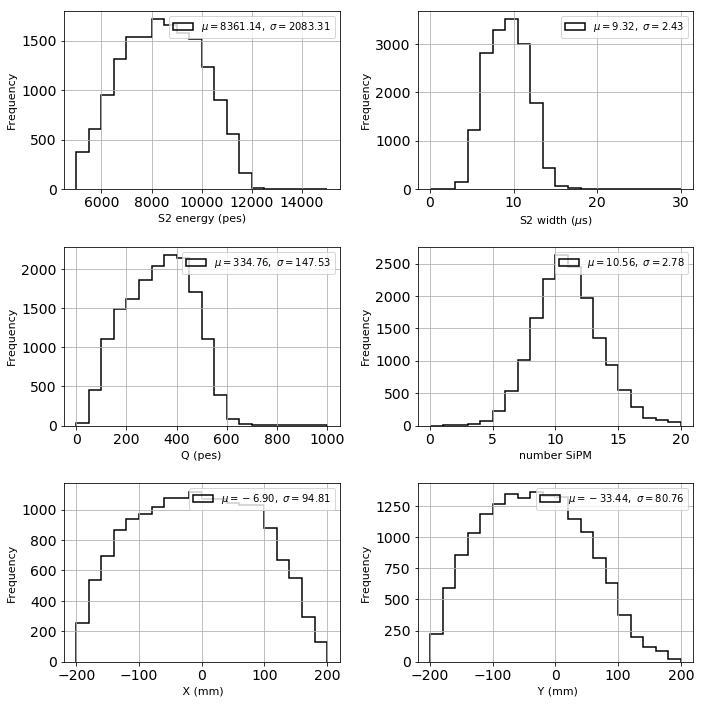

In [261]:
krf.plot_s2histos(dst1s12, bins=20, figsize=(10,10))

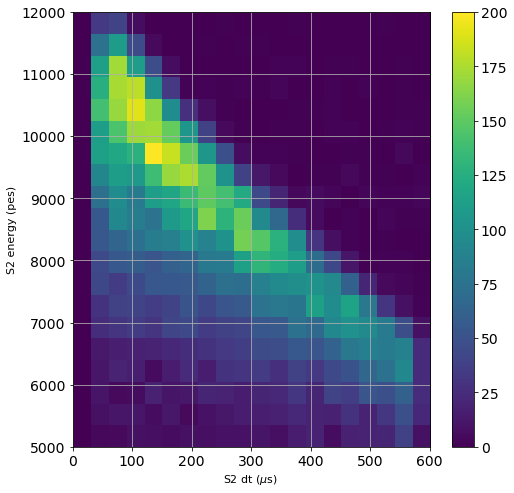

In [262]:
krf.h2d(dst1s12.ts2 - dst1s12.ts1, dst1s12.es2, bins=20,
    xrange=(0,600), yrange=(5000,12000), 
    xlabel=r'S2 dt ($\mu$s) ', ylabel= 'S2 energy (pes)')

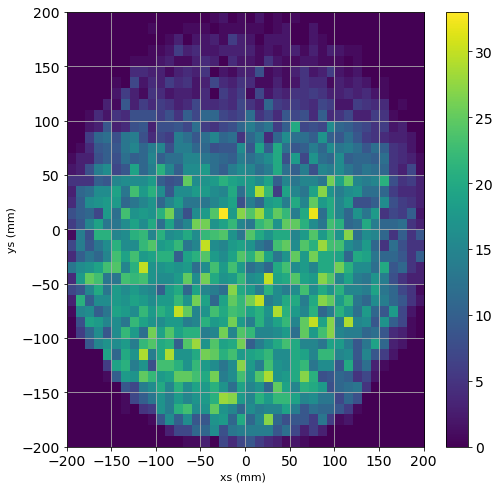

In [270]:
krf.h2d(dst1s12.xs2, dst1s12.ys2, bins=40,
    xrange=(-200,200), yrange=(-200,200), 
    xlabel=r'xs (mm) ', ylabel= 'ys (mm)')

fit par[0] = 9991.135353809466 error = 54.39639713001191
fit par[1] = -1544.0786539858589 error = 34.886194011706564
degrees of freedom = 2
chi2 = 1.1549531642392408


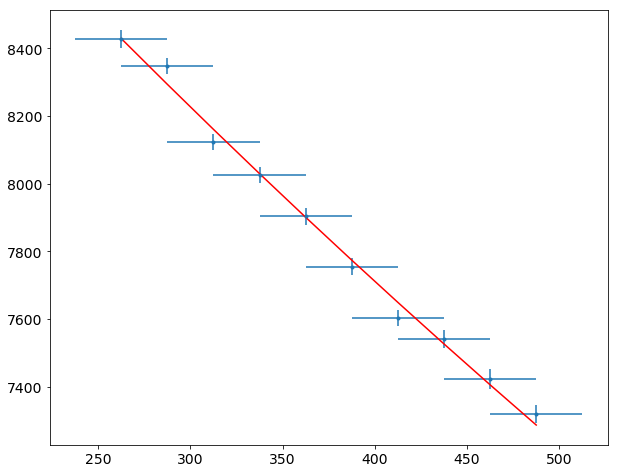

In [264]:
zrange =   250, 500
Erange = 7000, 9500
nbins = 10
F, x, y, sy = krf.profile_and_fit(dst1s12.ts2 - dst1s12.ts1, dst1s12.es2, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))

print_fit(F)
print('chi2 = {}'.format(chi2(F, x, y, sy)))

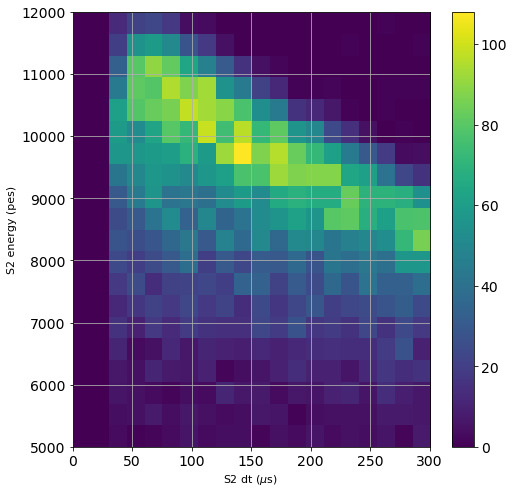

In [265]:
krf.h2d(dst1s12.ts2 - dst1s12.ts1, dst1s12.es2, bins=20,
    xrange=(0,300), yrange=(5000,12000), 
    xlabel=r'S2 dt ($\mu$s) ', ylabel= 'S2 energy (pes)')

fit par[0] = 10827.060807554026 error = 31.92282752851216
fit par[1] = -1728.1484612538716 error = 44.75165959691133
degrees of freedom = 2
chi2 = 2.1729195511326256


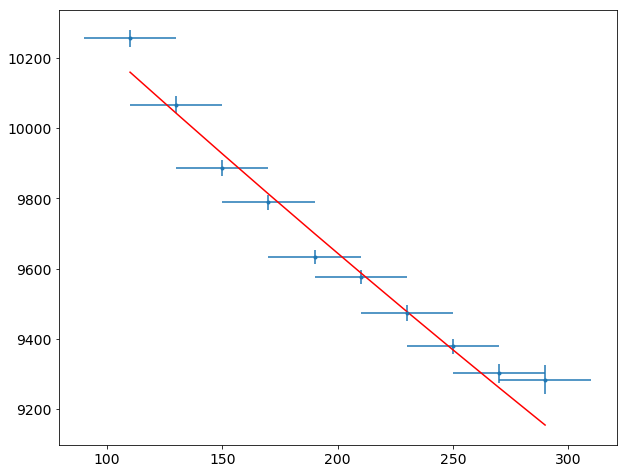

In [266]:
zrange =   100, 300
Erange = 9000, 11500
nbins = 10
F, x, y, sy = krf.profile_and_fit(dst1s12.ts2 - dst1s12.ts1, dst1s12.es2, 
                    xrange=zrange, 
                    yrange=Erange, 
                    nbins=nbins, 
                    fitpar=(50000,-300), label=("Drift time ($\mu$s)", "S2 energy (pes)"))

print_fit(F)
print('chi2 = {}'.format(chi2(F, x, y, sy)))

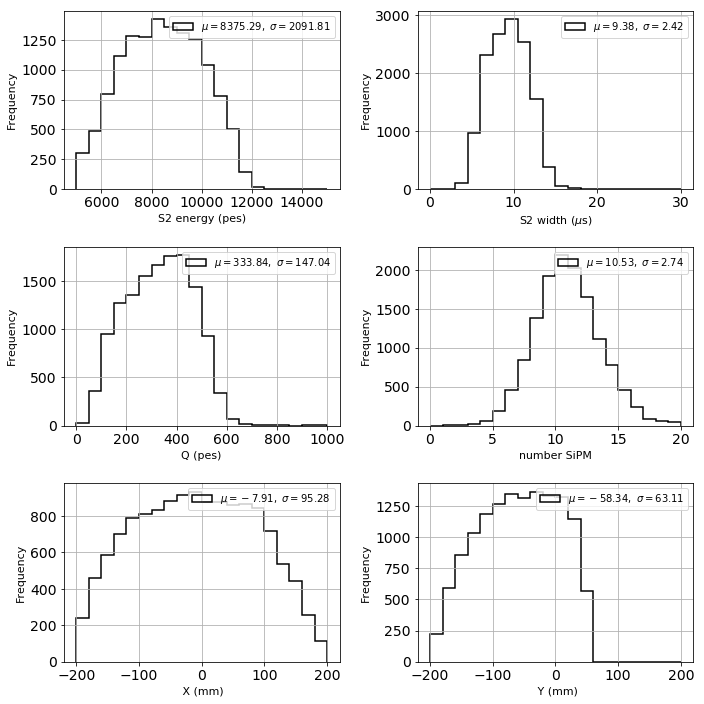

In [267]:
krf.plot_s2histos(dst1s12[dst1s12.ys2 < 50], bins=20, figsize=(10,10))

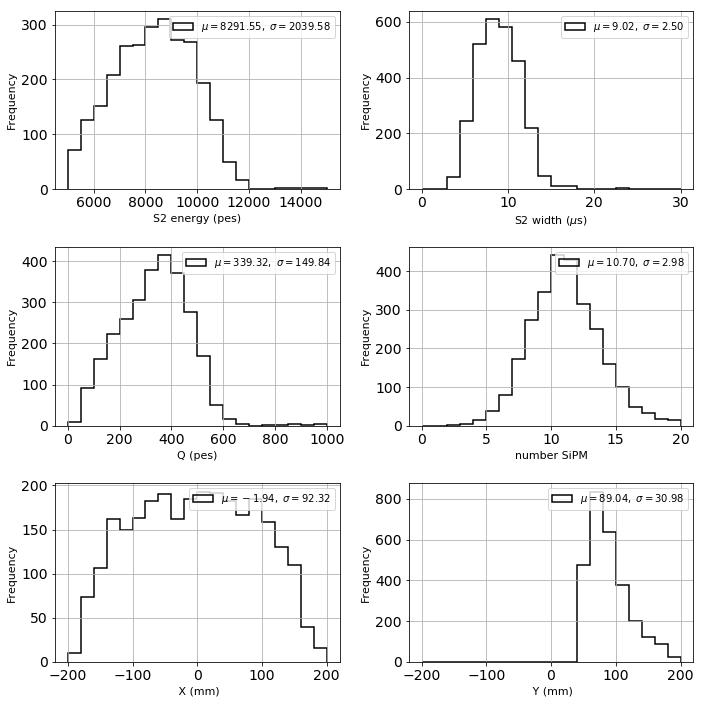

In [268]:
krf.plot_s2histos(dst1s12[dst1s12.ys2 > 50], bins=20, figsize=(10,10))

### ns1 = 2

In [196]:
dst2s1 = dst[dst.ns1==2]

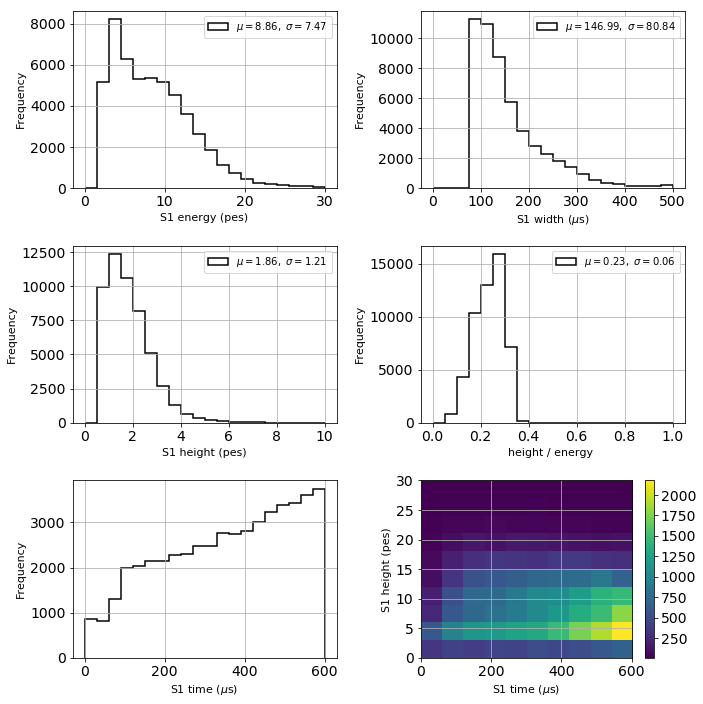

In [197]:
krf.plot_s1histos(dst2s1, bins=20, figsize=(10,10))

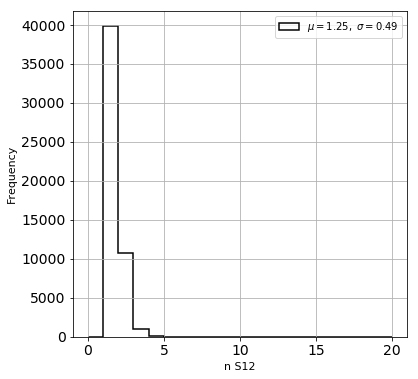

In [199]:
krf.histo_ns12(dst2s1.ns2)

In [202]:
dst2s12 = dst2s1[dst2s1.ns2==1]

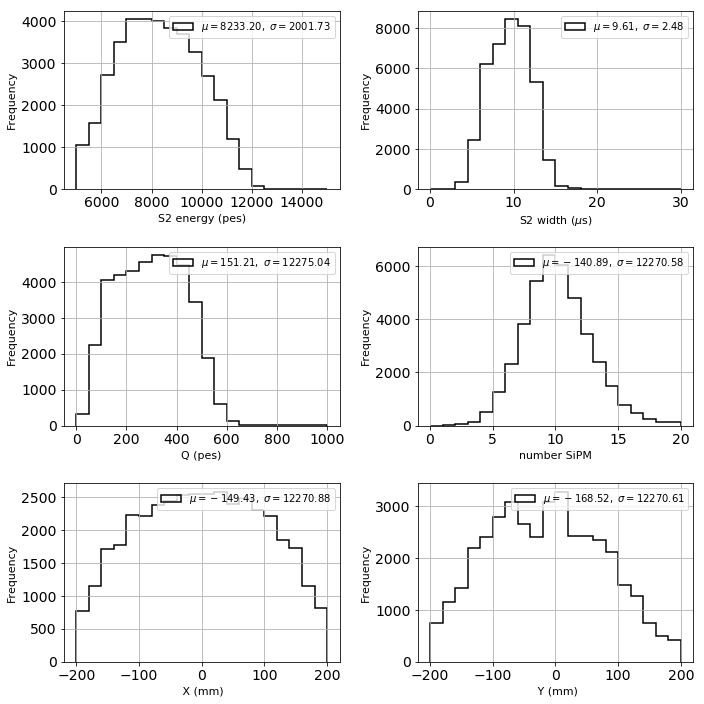

In [204]:
krf.plot_s2histos(dst2s12, bins=20, figsize=(10,10))

In [214]:
gbes2 =  dst2s12.es2.groupby(dst2s12.evt)

In [219]:
gbdst= dst2s12.groupby(['evt'])

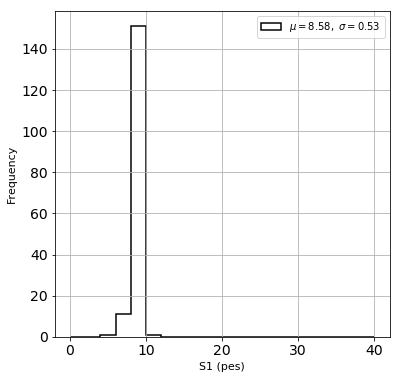

In [222]:
krf.h1d(gbdst.es1.mean(), bins=20, range=(0,40), xlabel='S1 (pes)')

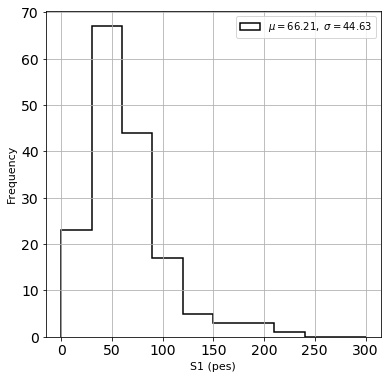

In [227]:
krf.h1d(gbdst.es1.max(), bins=10, range=(0,300), xlabel='S1 (pes)')

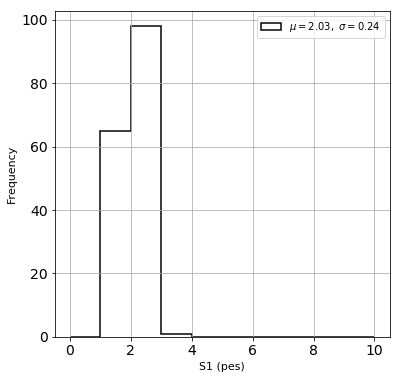

In [230]:
krf.h1d(gbdst.es1.min(), bins=10, range=(0,10), xlabel='S1 (pes)')

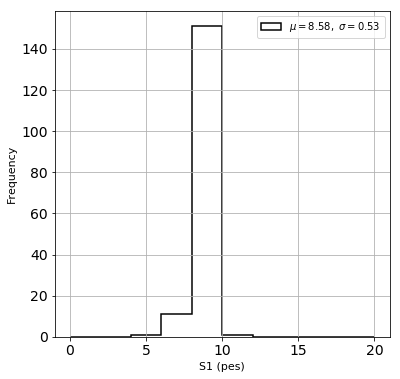

In [250]:
krf.h1d(gbdst.es1.mean(), bins=10, range=(0,20), xlabel='S1 (pes)')

In [231]:
dst22s12 = dst2s1[dst2s1.ns2==2]

In [232]:
gbdst2= dst22s12.groupby(['evt'])

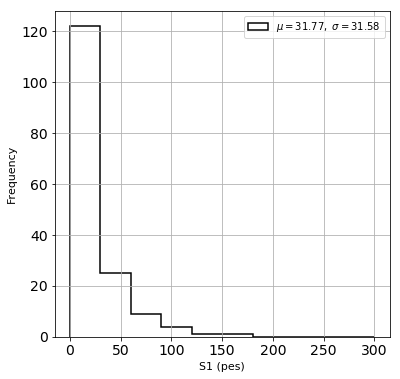

In [233]:
krf.h1d(gbdst2.es1.max(), bins=10, range=(0,300), xlabel='S1 (pes)')

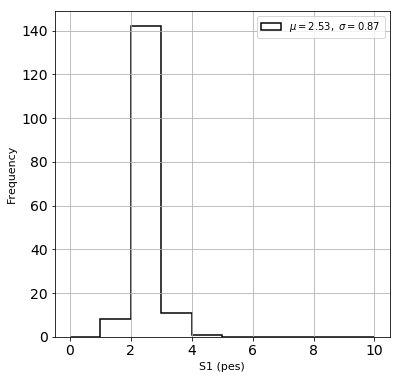

In [236]:
krf.h1d(gbdst2.es1.min(), bins=10, range=(0,10), xlabel='S1 (pes)')

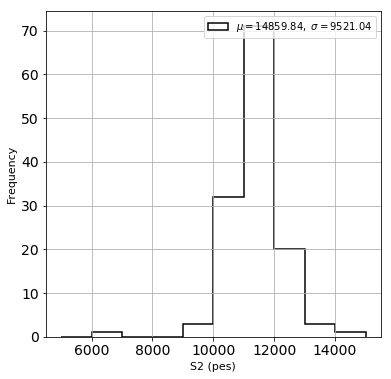

In [238]:
krf.h1d(gbdst2.es2.max(), bins=10, range=(5000,15000), xlabel='S2 (pes)')

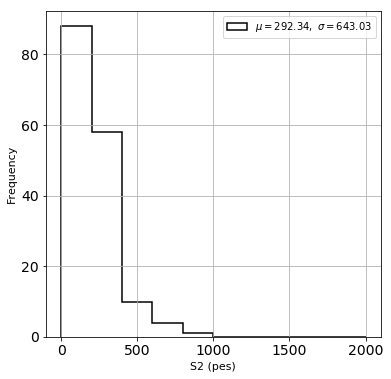

In [242]:
krf.h1d(gbdst2.es2.min(), bins=10, range=(0,2000), xlabel='S2 (pes)')

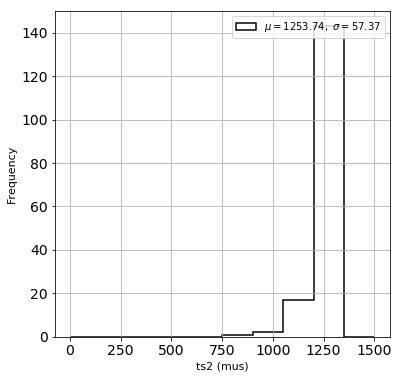

In [244]:
krf.h1d(gbdst2.ts2.max(), bins=10, range=(0,1500), xlabel='ts2 (mus)')

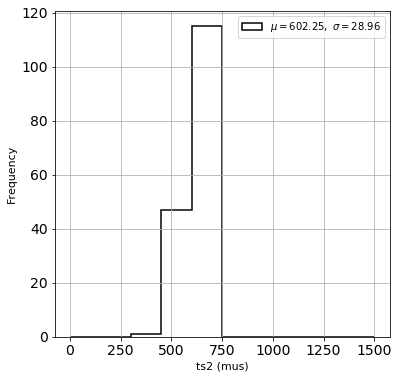

In [245]:
krf.h1d(gbdst2.ts1.max(), bins=10, range=(0,1500), xlabel='ts2 (mus)')

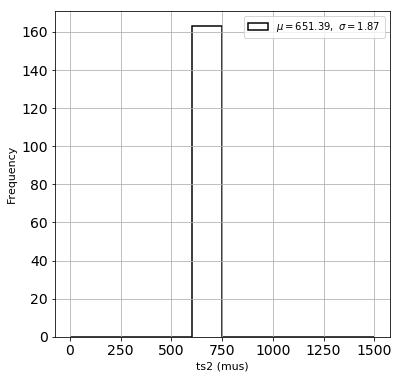

In [246]:
krf.h1d(gbdst2.ts2.min(), bins=10, range=(0,1500), xlabel='ts2 (mus)')

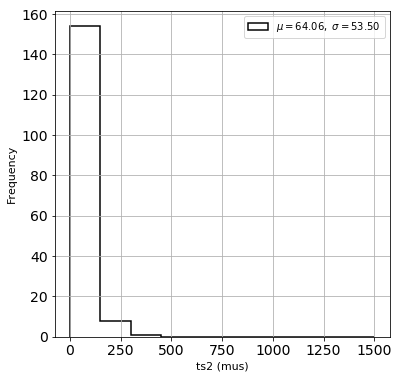

In [247]:
krf.h1d(gbdst2.ts1.min(), bins=10, range=(0,1500), xlabel='ts2 (mus)')